# Import Lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rfm = pd.read_csv('customer_rfm.csv')
rfm.drop(['Unnamed: 0','recency_date','r','f','m','rfm','rfm_score','customer_id'],axis=1,inplace=True)
rfm.head()

,recency,frequency,monetary
0,338,3,1148.7800
1,48,5,1119.4830
2,112,6,2602.5755
3,171,8,6255.3510
4,259,4,1790.5120


In [ ]:
!pip install yellowbrick

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    793 non-null    int64  
 1   frequency  793 non-null    int64  
 2   monetary   793 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 18.7 KB


# RFM Clear

In [ ]:
rfm_clear = rfm.copy()
initial = 0

## Check Outliers

In [ ]:
def get_upper_lower_bound(col):
    q1 = rfm_clear[col].quantile(0.25)
    q3 = rfm_clear[col].quantile(0.75)
    iqr = q3 - q1
    upper = iqr+1.5*iqr
    lower = iqr-1.5*iqr
    # outliers_percentage = rfm_clear[(rfm_clear[col] <= lower) | (rfm_clear[col] >= upper)][col].count() / len(rfm_clear)
    outliers_percentage = len(rfm_clear[(rfm_clear[col] < lower) | (rfm_clear[col] > upper)])
    print(outliers_percentage)
    return upper,lower

In [ ]:
upper_r, lower_r = get_upper_lower_bound('recency')
upper_f, lower_f = get_upper_lower_bound('frequency')
upper_m, lower_m = get_upper_lower_bound('monetary')
print(f'recency: {upper_r}, {lower_r}')
print(f'frequency: {upper_f}, {lower_f}')
print(f'monetary: {upper_m}, {lower_m}')

18
187
33
recency: 312.5, -62.5
frequency: 7.5, -1.5
monetary: 5460.901249999999, -1092.18025


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

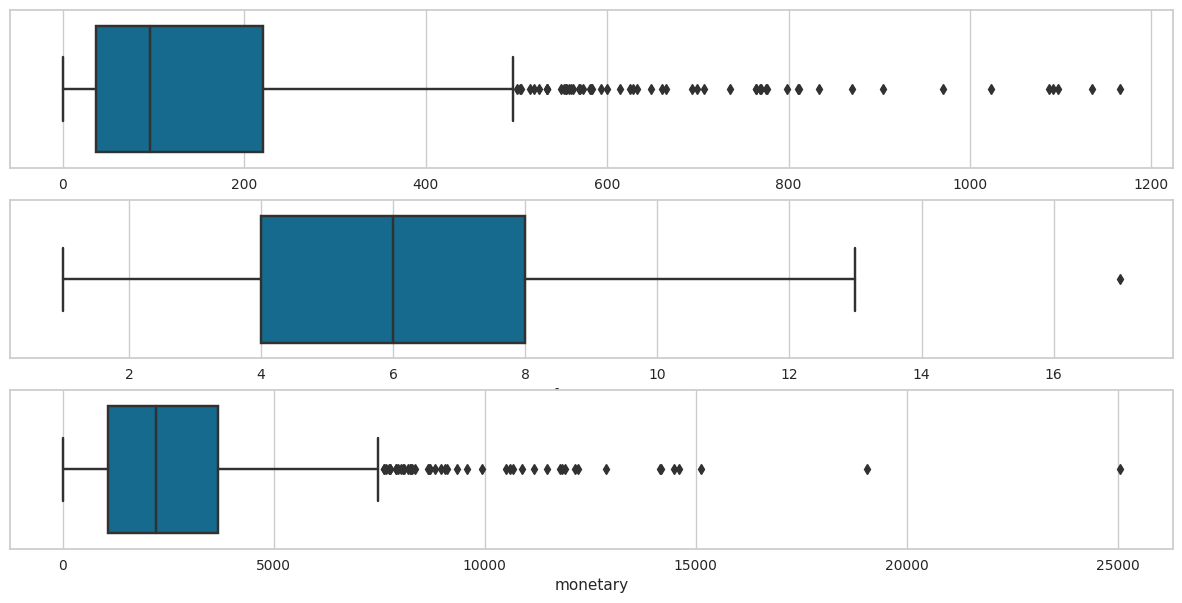

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,7))

j=0
for i in cols:
    j += 1
    sns.boxplot(data=rfm, x=i, ax=ax[j-1])
    # sns.legend()

## Drop Outliers

In [ ]:
def drop_outliers(data, cols):
    # rfm_clear = rfm.copy()
    global initial
    initial = initial + 1

    print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

    filtered_entries = np.array([True] * len(data))
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1 - (IQR * 1.5)
        high_limit = Q3 + (IQR * 1.5)

        filtered_entries = ((data[col] >= low_limit) & (data[col] <= high_limit)) & filtered_entries

    
    data = data[filtered_entries]
    print(f'Jumlah baris setelah memfilter outlier: {len(data)}')
    print(f'run ke-{initial}')
    return data

In [ ]:
cols = ['recency', 'frequency', 'monetary']
rfm_clear = drop_outliers(rfm_clear, cols)

Jumlah baris sebelum memfilter outlier: 627
Jumlah baris sebelum memfilter outlier: 627
run ke-6


In [ ]:
rfm_clear.head()

,recency,frequency,monetary
0,338,3,1148.7800
1,48,5,1119.4830
2,112,6,2602.5755
3,171,8,6255.3510
4,259,4,1790.5120


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

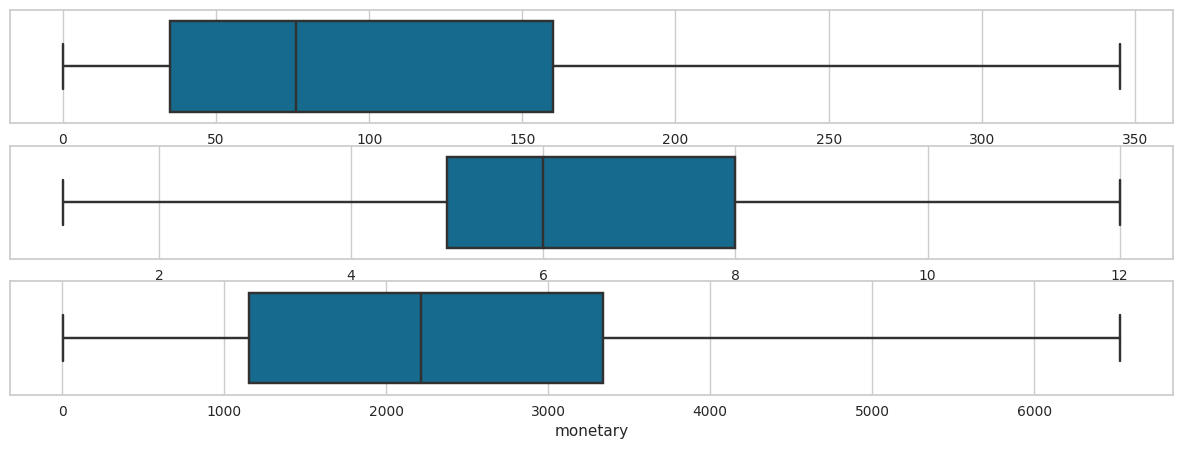

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,5))

j=0
for i in cols:
    j += 1
    sns.boxplot(data=rfm_clear, x=i, ax=ax[j-1])
print(f'run ke-{initial}')

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms = MinMaxScaler()
rfm_mms = rfm_clear.copy()
rfm_mms = mms.fit_transform(rfm_mms)
rfm_mms = pd.DataFrame(rfm_mms, columns=['recency','frequency','monetary'])
rfm_mms.head()

,recency,frequency,monetary
0,0.979710,0.181818,0.175366
1,0.139130,0.363636,0.170875
2,0.324638,0.454545,0.398231
3,0.495652,0.636364,0.958198
4,0.750725,0.272727,0.273743


In [ ]:
scaler = StandardScaler()
rfm_scaled = rfm_clear.copy()
rfm_scaled = scaler.fit_transform(rfm_scaled)
rfm_scaled = pd.DataFrame(rfm_scaled,columns=['recency','frequency','monetary'])
rfm_scaled.head()

,recency,frequency,monetary
0,2.645909,-1.450342,-0.815489
1,-0.626874,-0.581799,-0.834164
2,0.095395,-0.147528,0.111245
3,0.761238,0.721015,2.439738
4,1.754358,-1.016071,-0.406411


# Modelling

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

## Kmeans

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

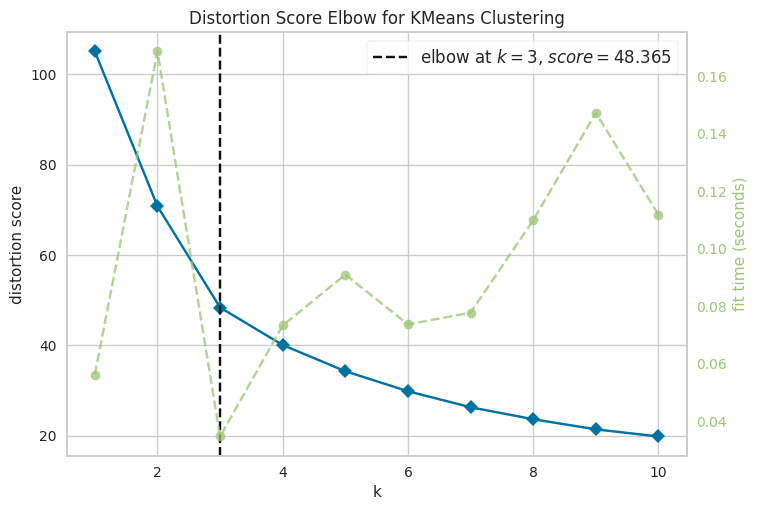

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow = KElbowVisualizer(KMeans(random_state=42),k=(1,11))
elbow.fit(rfm_mms)
elbow.show()

Silhouette Score cluster=3: 0.3257523841785382

Silhouette Score cluster=4: 0.29172898922838875

Silhouette Score cluster=5: 0.29026059846621516

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following f

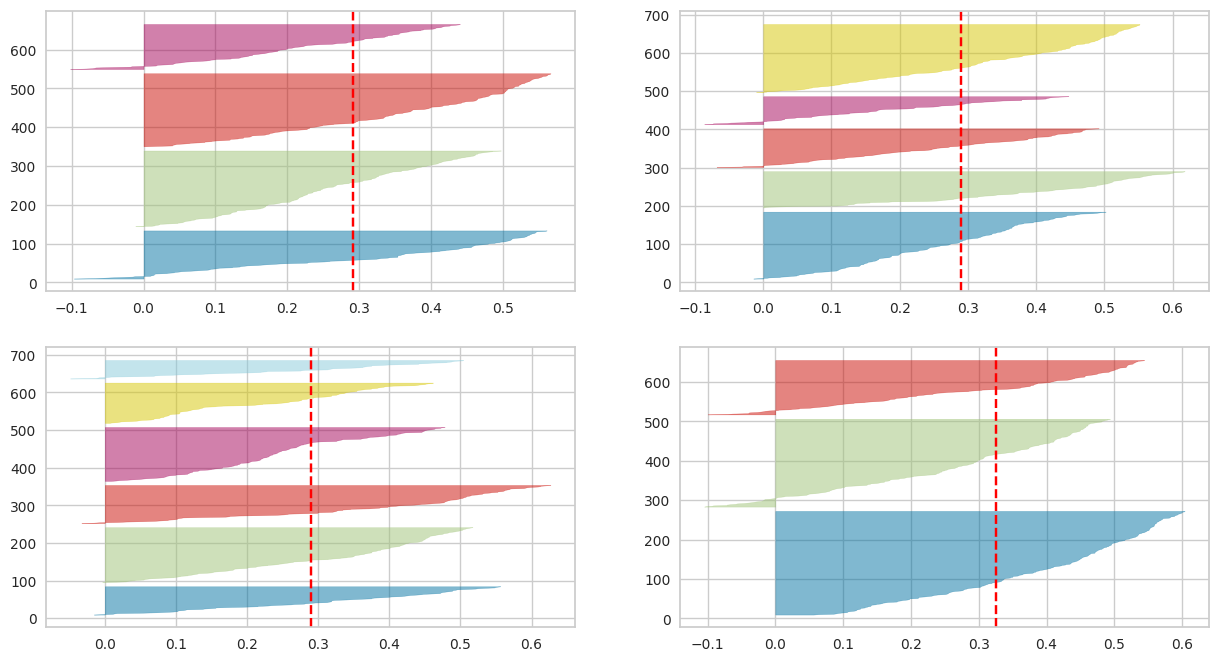

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [3, 4, 5, 6]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(rfm_mms)
    print(f'Silhouette Score cluster={i}: {visualizer.silhouette_score_}\n')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

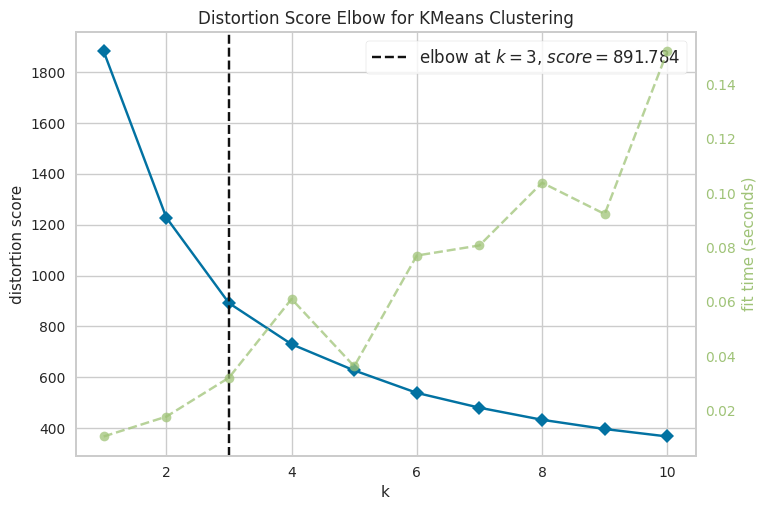

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow = KElbowVisualizer(KMeans(random_state=42),k=(1,11))
elbow.fit(rfm_scaled)
elbow.show()

Silhouette Score cluster=3: 0.34915277648213616

Silhouette Score cluster=4: 0.33508736986506077

Silhouette Score cluster=5: 0.31187127696965755

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following 

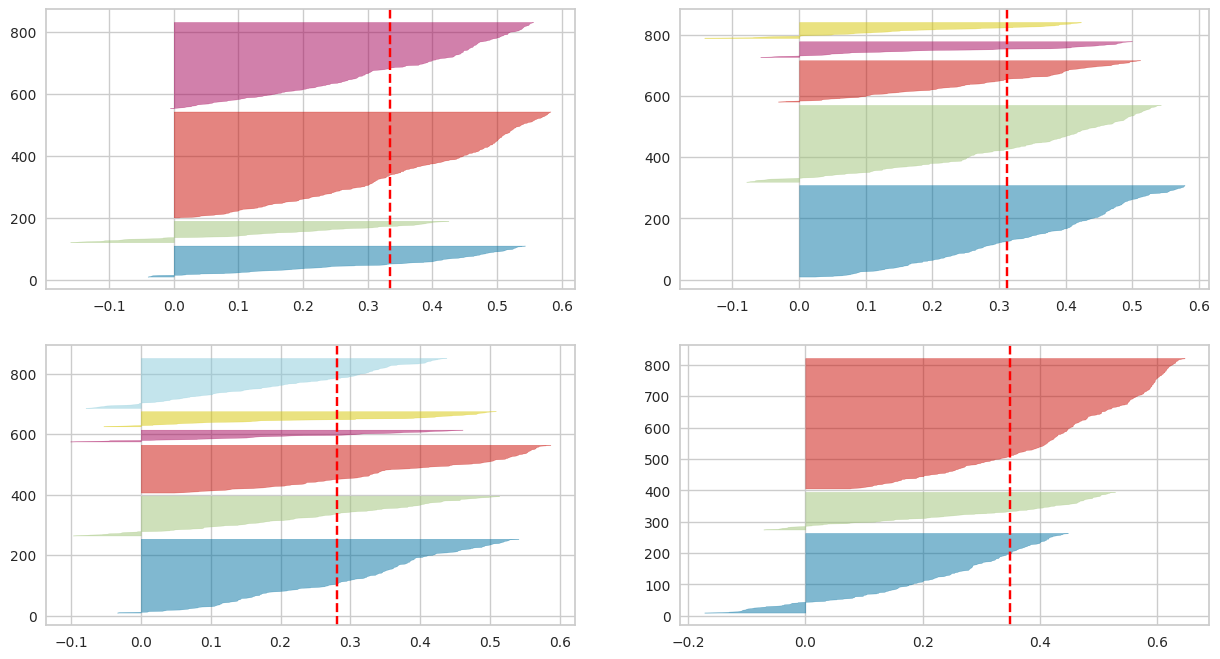

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [3, 4, 5, 6]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(rfm_scaled)
    print(f'Silhouette Score cluster={i}: {visualizer.silhouette_score_}\n')

k = 3 -> 0.5688246498838809
k = 4 -> 0.5557848060113691
k = 5 -> 0.5538496737069593
k = 6 -> 0.546916488389712

# Evaluation

# With Scaling

In [ ]:
model_scaled = KMeans(3,random_state=42)
cluster = model_scaled.fit_predict(rfm_mms)

In [ ]:
rfm_new = rfm_clear.copy()
rfm_new['cluster'] = cluster
rfm_new.head()

,recency,frequency,monetary,cluster
0,338,3,1148.7800,2
1,48,5,1119.4830,0
2,112,6,2602.5755,0
3,171,8,6255.3510,1
4,259,4,1790.5120,2


# Without Scaling

In [ ]:
model = KMeans(3,random_state=42)
cluster = model.fit_predict(rfm_mms)

In [ ]:
rfm_copy = rfm.copy()
rfm_copy['cluster'] = cluster
rfm_copy.head()

,recency,frequency,monetary,cluster
0,338,3,1148.7800,0
1,48,5,1119.4830,0
2,112,6,2602.5755,0
3,171,8,6255.3510,2
4,259,4,1790.5120,0


In [ ]:
rfm_copy.describe()

,recency,frequency,monetary,cluster
count,793.000000,793.000000,793.000000,793.000000
mean,164.776797,6.206810,2851.520064,0.699874
std,191.154426,2.525647,2620.398490,0.918779
min,0.000000,1.000000,4.833000,0.000000
25%,37.000000,4.000000,1081.466000,0.000000
50%,96.000000,6.000000,2215.002000,0.000000
75%,221.000000,8.000000,3670.258000,2.000000
max,1165.000000,17.000000,25043.050000,2.000000


<AxesSubplot: ylabel='monetary'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

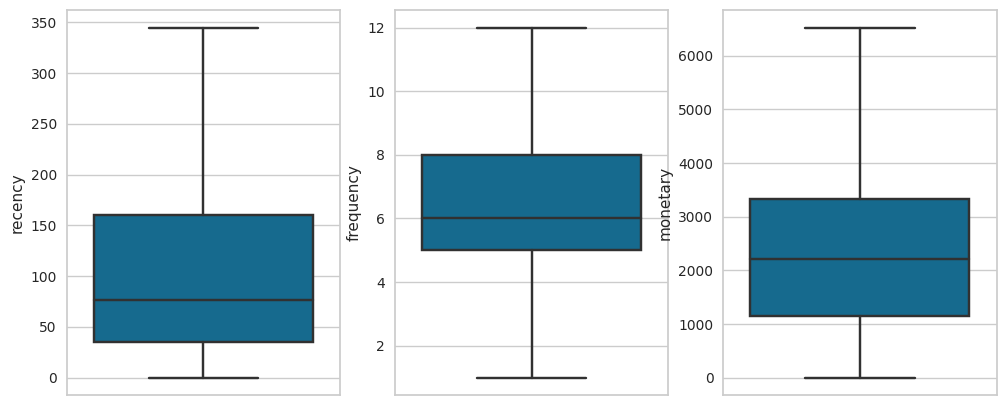

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
sns.boxplot(y=rfm_new['recency'],ax=ax[0])
sns.boxplot(y=rfm_new['frequency'],ax=ax[1])
sns.boxplot(y=rfm_new['monetary'],ax=ax[2])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

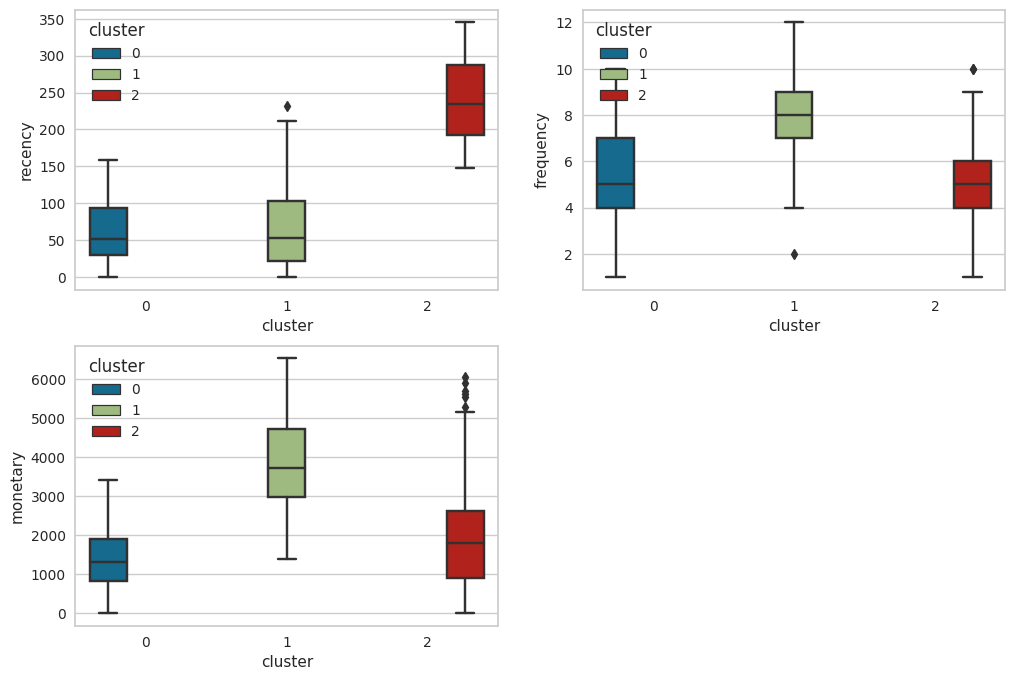

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(y=rfm_new['recency'],x=rfm_new['cluster'],hue=rfm_new['cluster'],ax=ax[0][0])
sns.boxplot(y=rfm_new['frequency'],x=rfm_new['cluster'],hue=rfm_new['cluster'],ax=ax[0][1])
sns.boxplot(y=rfm_new['monetary'],x=rfm_new['cluster'],hue=rfm_new['cluster'],ax=ax[1][0])
fig.delaxes(ax[1][1])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

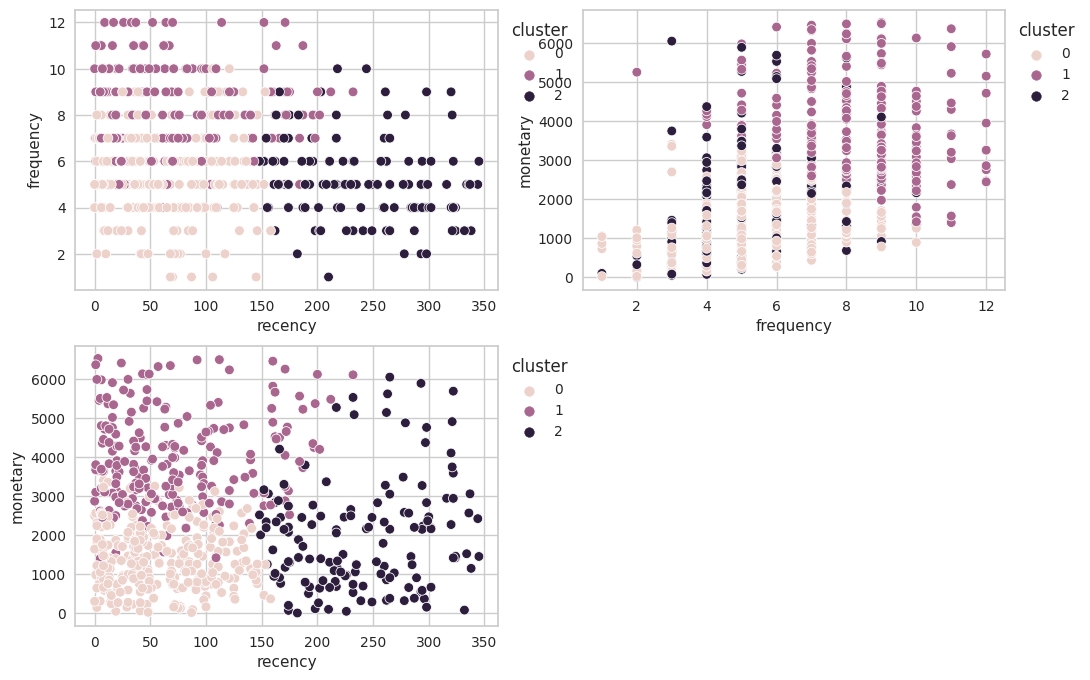

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
s1 = sns.scatterplot(x=rfm_new['recency'],y=rfm_new['frequency'],hue=rfm_new['cluster'],ax=ax[0][0])
s2 = sns.scatterplot(x=rfm_new['frequency'],y=rfm_new['monetary'],hue=rfm_new['cluster'],ax=ax[0][1])
s3 = sns.scatterplot(x=rfm_new['recency'],y=rfm_new['monetary'],hue=rfm_new['cluster'],ax=ax[1][0])
sns.move_legend(s1, 'upper left',bbox_to_anchor=(1, 1))
sns.move_legend(s2, 'upper left',bbox_to_anchor=(1, 1))
sns.move_legend(s3, 'upper left',bbox_to_anchor=(1, 1))
fig.delaxes(ax[1][1]) #rf, fm, rm, fm

## Clustering - Customer Segmentation

- Cluster 0 = low monetary, new recency, low frequency

- Cluster 1 = high monetary, new recency, high frequency

- Cluster 2 = moderate monetary, old recency, mid frequency

## Marketing Strategy

Cluster 0 - Develop the Customers = Butuh untuk menaikan frekuensi belanja dan total spend customer.
Proposed strategy :
1. Mengembangkan strategi CRM untuk memperkuat ikatan dengan customer / Customer Loyalty.
2. Memberikan diskon setelah pembelian ke-sekian "Dapatkan diskon 25% pada pembelian ketiga Anda".
3. Promote high value product to improve basket size.


Cluster 1 - Loyalty Customers = butuh untuk mengembangkan relationship / CRM
Proposed strategy:
1. Mengembangkan strategi CRM untuk memperkuat ikatan dengan customer / Customer Loyalty (Loyalty Card, Birthday Gift/Discount etc).
2. Targetting untuk produk-produk baru (New Product Development).




Cluster 2 - Win Back the Customers = Butuh untuk memastikan customer melakukan purchase kembali
Proposed Strategy:
1. Coupon Reactivation to get the customer doing immediate purchase.
2. Improve Quality Product



shipping discount (e.g. express)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62f2892d-e229-4b14-88cf-61638177e289' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>